# Perceptron

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],\
                 'grumpy_proportion':[0.1,0.6,0.2,0.9],\
                 'prediction':['kitten','kitten','kitten','adult']})
df

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


In [2]:
kitten=df[df['prediction']=='kitten']
adult=df[df['prediction']=='adult']

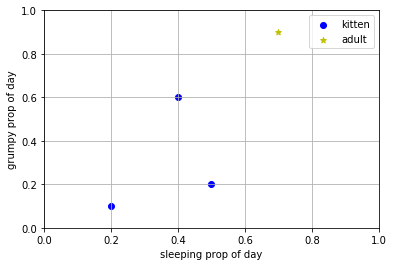

In [3]:
plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],color='b', marker='o',label='kitten')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],color='y', marker='*',label='adult')
plt.xlabel('sleeping prop of day')
plt.ylabel('grumpy prop of day')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [4]:
df['bprediction']= df['prediction'].apply(lambda x: x=='kitten')
from sklearn.linear_model import Perceptron

classifier= Perceptron(max_iter=1000)
model= classifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


[ True]
[False]
[ True  True]


In [6]:
import numpy as np
xmin,xmax=0,1
ymin,ymax=0,1
xx,yy=np.meshgrid(np.arange(xmin,xmax,0.001),np.arange(ymin,ymax,0.001))
# print(xx)   
# print(yy)
xxlin=xx.ravel()
# print(xxlin)
yylin=yy.ravel()
# print(yylin)
predinput=np.c_[xxlin,yylin]
# print(predinput)
z=model.predict(predinput)
# print(z)
z=z.reshape(xx.shape)
# print(z)

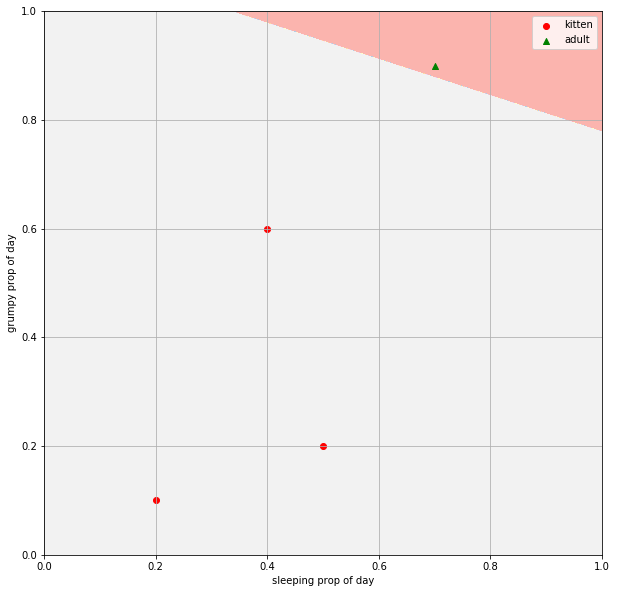

In [11]:
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)

plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],color='r', marker='o',label='kitten')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],color='g', marker='^',label='adult')
plt.xlabel('sleeping prop of day')
plt.ylabel('grumpy prop of day')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [8]:
print(model.coef_)

[[-0.3 -0.9]]


In [9]:
print(model.intercept_)

[1.]


In [10]:
print(model.n_iter_)

1000


## Support vector machine

Eliminates the drawback of bias generated by perceptron by increasing the width of separation.

In [12]:
from sklearn.svm import SVC

SVCclassifier= SVC(kernel='linear', C= 10, max_iter=5)
SVCmodel= SVCclassifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


In [14]:
print(SVCmodel.predict([[0.2,0.1]]))
print(SVCmodel.predict([[0.7,0.9]]))
print(SVCmodel.predict([[0.5,0.5],[0.8,0.3]]))

[ True]
[False]
[ True  True]


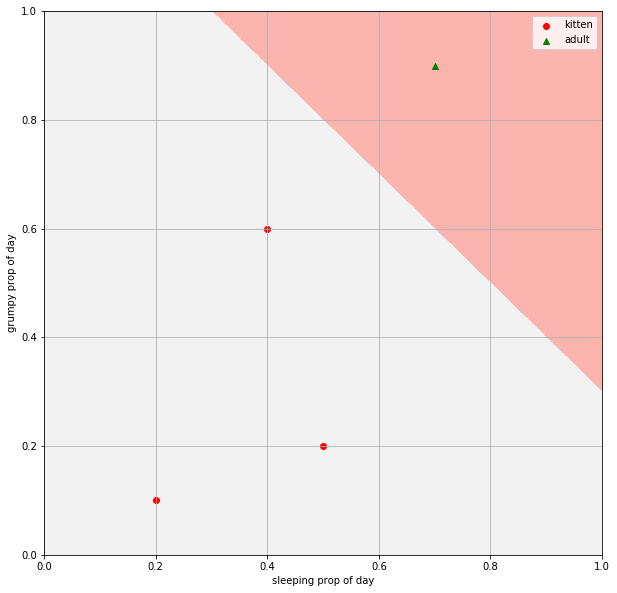

In [15]:
z=SVCmodel.predict(predinput)
z=z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],color='r', marker='o',label='kitten')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],color='g', marker='^',label='adult')
plt.xlabel('sleeping prop of day')
plt.ylabel('grumpy prop of day')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()